In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


borrow = pd.read_csv('borrower_data.csv')
loan = pd.read_csv('loan_data.csv')

In [3]:
dat = pd.merge(borrow, loan, how = 'outer', on = 'loan_id')

# Data overview

In [4]:
dat.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  \
0             1073            0              0   47                 3   
1             5299            1          13500   33                 1   
2             3422            1          24500   38                 8   
3             3388            0              0   24                 1   
4             4282            1          18100   36                 1   

      loan_purpose        date  loan_granted  loan_repaid  
0         business  2012-01-31             0          NaN  
1       investment  2012-11-02             0          NaN  
2            other  2012-07-16             1          1.0  
3       investment  2012-06-05             0          NaN  
4  emergency_funds  2012-11-28             0          NaN

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 16 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
loan_purpo

In [6]:
# Number of NaNs for each object, print out the first 15 rows to see:
dat.isnull().sum(axis=1).head(15)

0     3
1     1
2     2
3     1
4     1
5     2
6     3
7     2
8     0
9     0
10    2
11    2
12    4
13    0
14    1
dtype: int64

Just by reviewing the head of the lists we immediately see that many rows have 2 Nan values, it coud be some patterns. So we can use row index as a feature?

In [7]:
# Number of NaNs for each column:
dat.isnull().sum(axis=0)/dat.shape[0]

loan_id                                            0.000000
is_first_loan                                      0.000000
fully_repaid_previous_loans                        0.543492
currently_repaying_other_loans                     0.543492
total_credit_card_limit                            0.000000
avg_percentage_credit_card_limit_used_last_year    0.068961
saving_amount                                      0.000000
checking_amount                                    0.000000
is_employed                                        0.000000
yearly_salary                                      0.000000
age                                                0.000000
dependent_number                                   0.000000
loan_purpose                                       0.000000
date                                               0.000000
loan_granted                                       0.000000
loan_repaid                                        0.528645
dtype: float64

We immediately see the patterns, exactly 54947 NaNs for 2 columns.

# Dataset clean

### Constant feature?

In [8]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = dat.nunique(dropna = False)

In [9]:
# Look at each column to find constant features:
feats_counts.sort_values()

is_first_loan                                           2
is_employed                                             2
loan_granted                                            2
fully_repaid_previous_loans                             3
currently_repaying_other_loans                          3
loan_repaid                                             3
loan_purpose                                            5
dependent_number                                        9
age                                                    62
avg_percentage_credit_card_limit_used_last_year       111
total_credit_card_limit                               125
date                                                  260
yearly_salary                                         834
saving_amount                                        6845
checking_amount                                      9653
loan_id                                            101100
dtype: int64

There is no constant feature. Each column has at least 2 unique values!

### Duplicated features?

In [10]:
#dat = dat.T.drop_duplicates()

In [11]:
#dat = dat.T
#dat.shape

There is no duplicated feature.

### Encode categorical feature(s):

In [12]:
# Check ration of each category: 
dat.groupby(dat.loan_purpose).size()/dat.shape[0]

loan_purpose
business           0.214708
emergency_funds    0.178942
home               0.240495
investment         0.212502
other              0.153353
dtype: float64

We see that the ratio between class is not too different. Thus no need to encode the feature by frequency. We use label encoding since the categories are not ordinal.

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dat['loan_purpose'] = labelencoder.fit_transform(dat['loan_purpose'])

In [14]:
dat.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  \
0             1073            0              0   47                 3   
1             5299            1          13500   33                 1   
2             3422            1          24500   38                 8   
3             3388            0              0   24                 1   
4             4282            1          18100   36                 1   

   loan_purpose        date  loan_granted  loan_repaid  
0             0  2012-01-31             0          NaN  
1             3  2012-11-02             0          NaN  
2             4  2012-07-16             1          1.0  
3             3  2012-06-05             0          NaN  
4             1  2012-11-28             0          NaN

### Change to date time type of 'date' feature.

In [15]:
dat['date'] =  pd.to_datetime(dat['date'], format = '%Y-%m-%d')

In [16]:
dat['month'] = dat.date.dt.month
dat.groupby(dat.month).size()/dat.shape[0]

month
1     0.086390
2     0.081177
3     0.081721
4     0.082770
5     0.089011
6     0.080267
7     0.085114
8     0.086954
9     0.077062
10    0.090415
11    0.083274
12    0.075846
dtype: float64

In [17]:
# The day of the week with Monday=0, Sunday=6
dat['weekday'] = dat.date.dt.weekday
dat.groupby(dat.weekday).size()/dat.shape[0]

weekday
0    0.226835
1    0.230010
2    0.211167
3    0.193323
4    0.138665
dtype: float64

In [18]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 18 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
loan_purpo

# Visualization


## 1. Check each feature

(array([ 9630., 12580., 16174., 17106., 16078., 12776.,  8470.,  4840.,
         2374.,  1072.]),
 array([18. , 24.1, 30.2, 36.3, 42.4, 48.5, 54.6, 60.7, 66.8, 72.9, 79. ]),
 <a list of 10 Patch objects>)

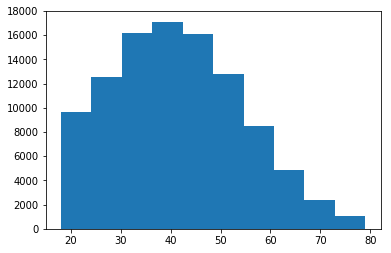

In [19]:
plt.hist(dat.age)

(array([3.7452e+04, 9.8530e+03, 1.7230e+04, 1.6859e+04, 1.1274e+04,
        5.7250e+03, 2.0980e+03, 5.1200e+02, 8.6000e+01, 1.1000e+01]),
 array([    0.,  9720., 19440., 29160., 38880., 48600., 58320., 68040.,
        77760., 87480., 97200.]),
 <a list of 10 Patch objects>)

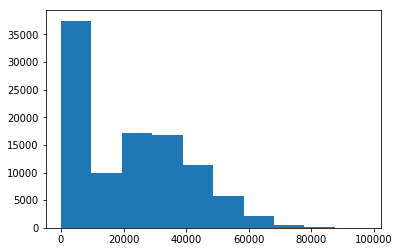

In [20]:
plt.hist(dat.yearly_salary)

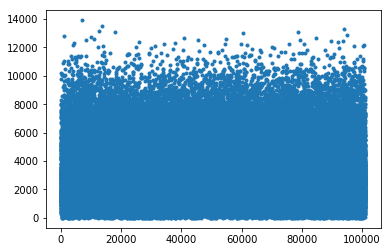

In [21]:
# Row index vs feature values: check xem randomnesse (nếu không có đường thẳng từ trên xuống nào thì là random)
# Neu thay nhieu horizontal lines: tuc la co repeated values trong feature nay.
plt.plot(dat.checking_amount, '.')

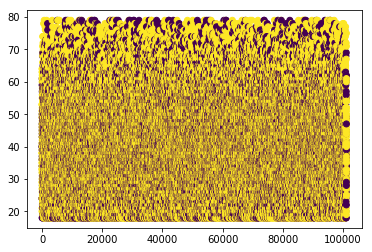

In [22]:
plt.scatter(range(len(dat.age)), dat.age, c = dat.is_employed)

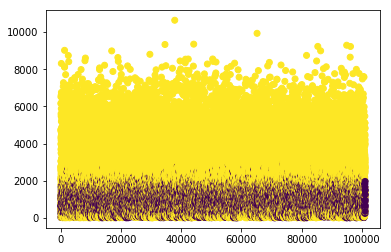

In [23]:
plt.scatter(range(len(dat.saving_amount)), dat.saving_amount, c = dat.loan_repaid)

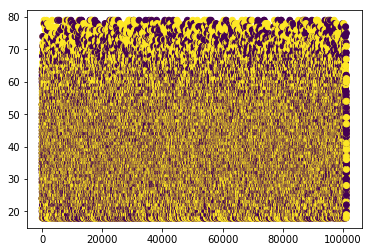

In [24]:
plt.scatter(range(len(dat.age)), dat.age, c = dat.is_first_loan)

## 2. Check each pair of features

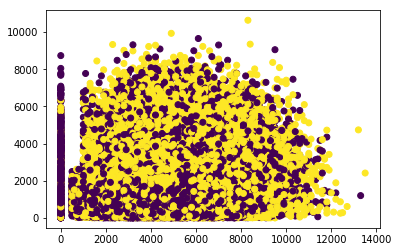

In [25]:
plt.scatter(dat.total_credit_card_limit, dat.saving_amount, c = dat.loan_granted)

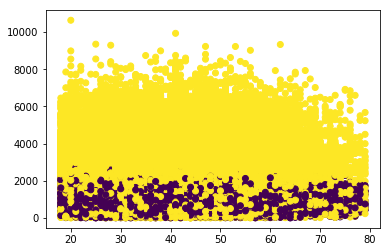

In [26]:
plt.scatter(dat.age, dat.saving_amount, c = dat.loan_repaid)

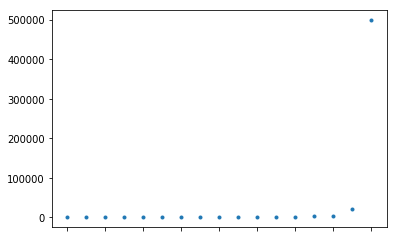

In [27]:
dat.mean().sort_values().plot(style = '.')

## Split Train set and Test set

In [28]:
X = dat.drop(['loan_id', 'loan_repaid', 'loan_granted', 'date'], axis = 1)
y = dat['loan_repaid']

# Chia thành Test set và Training Set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17, stratify= None)

print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)

Train shape:  (70770, 14)
Test shape:  (30330, 14)


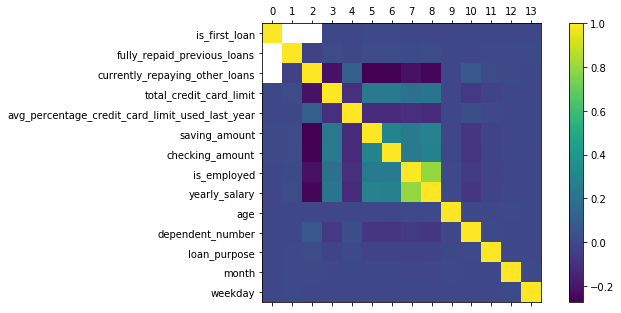

In [29]:
plt.figure(figsize=(10,5))
plt.matshow(X.corr(), fignum=1)
plt.xticks(range(len(X.columns)))
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

### 3. Check xem phân bố các class ở test set và train set có đều không?

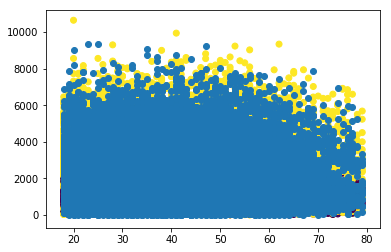

In [30]:
plt.figure()

plt.scatter(X_train.age, X_train.saving_amount , c = y_train)
plt.scatter(X_test.age, X_test.saving_amount)

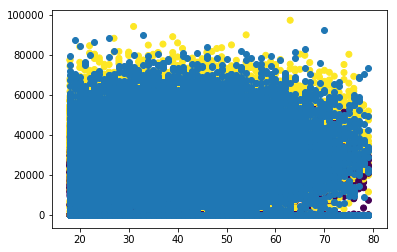

In [31]:
plt.figure()

plt.scatter(X_train.age, X_train.yearly_salary , c = y_train)
plt.scatter(X_test.age, X_test.yearly_salary)

Tập test và training phân bố đều các trường hợp

# Ensemble model

In [49]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [33]:
!pip install mlxtend
from mlxtend.classifier import EnsembleVoteClassifier
#eclf = EnsembleVoteClassifier(clfs=[lr, dt, rf, svm], weights=[1,1,1,1])

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Prepare the training set and testing set, drop all NAs values.

In [34]:
dat1 = dat.dropna()

In [35]:
X_nona = dat1.drop(['loan_id', 'loan_repaid', 'loan_granted', 'date'], axis = 1)
y_nona = dat1['loan_repaid']

# Chia thành Test set và Training Set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_nona, y_nona, test_size = 0.3, random_state = 17, stratify= None)

print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)

Train shape:  (15006, 14)
Test shape:  (6432, 14)


### 1. Logistic model:

In [36]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8431281094527363

### 2. SVM: 

In [37]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6427238805970149

### 3. Decision Tree

In [47]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8902363184079602

### 4. Naive Bayes

In [55]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9219527363184079

### 5. Random forest vs Bagging of Decision Tree:

In [57]:
#Random Forest - Ensemble of Descision Trees
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9207089552238806

In [56]:
#Bagging of decision tree
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train,y_train)
bg.score(X_test,y_test)

0.9189987562189055

We notice that the scores between 2 classes are quite similar. It agrees with the theory that Random forest is an ensemble method of Decision tree.

### 6. Ensemble Votes of Logistic Regression, SVM, Naive Bayes and Random Forest

In [72]:
from mlxtend.classifier import EnsembleVoteClassifier
eclf = EnsembleVoteClassifier(clfs=[lr, svm, nb, rf], weights=[1,1,1,1])
scores = model_selection.cross_val_score(eclf, X_test, y_test, cv=5,scoring='accuracy')
scores.mean()

C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

0.920396793675503

Unfortunately, this method is not as good as Random Forest and Naive Bayes.

### 7. Bagging of decision tree & Bootstrap

In [54]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False,
n_jobs=1,random_state=1)
bag.fit(X_train, y_train)
bag.score(X_test, y_test)

0.9216417910447762

So far, Bagging of decision tree with bootstrap method still a bit lower than Naive Bayes

### 8. Ada Boosting - Naive Bayes

In [63]:
adb = AdaBoostClassifier(GaussianNB(),n_estimators = 500, learning_rate = 0.1, random_state=1)
adb.fit(X_train,y_train)
adb.score(X_test,y_test)

0.9255286069651741

## Conclusion:
By using 8 models from the simplest to more complicated one, we notice that Adapt Boosting for Naive Bayes works the best with the accuracy score is 0.9255. However, we need to tune the hyperparameters of these simple classifiers as well as the ensemble ones. Moreover, we might get better result with Stacked method. Due to the limitation of time, I did not do the Tunning the hyperparameters nor the stacked method.